In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Constants
Thickness = 6.035  # m (6.035mm)
Width = 20  # m (20 mm)
area = Thickness * Width  # Calculate the area of the specimen

# Load tensile test data
df = pd.read_csv('TestData.csv', header=[0, 1])


In [49]:
df.columns = [f"{col[0]} {col[1]}" for col in df.columns]

In [50]:
# Extract relevant columns
time = df["Time (sec)"]
displacement = df["Crosshead separation (mm)"]
force = df["Load (kN)"]
elongation = df["Extensometer elongation (%)"]
strain = elongation/100  # Strain in mm/mm

In [51]:
# Calculate stress and strain
force = force * 1000 # Convert kN to N
stress = (force / area)  # N/m^2 or Pa
uts = stress.max()
elastic_low = 0.1 * uts
elastic_up = 0.4 * uts

In [52]:
stress = (force / area)  # N/m^2 or Pa

In [53]:
uts = stress.max()

In [54]:
uts

np.float64(452.2898094449047)

In [55]:
elastic_low = 0.1 * uts
elastic_up = 0.4 * uts

In [56]:
elastic_reg = (elastic_low <= stress) & (stress <= elastic_up)
#strain_ela = strain.reset_index(drop=True)
#stress_ela = stress.reset_index(drop=True)

In [57]:
stress_ela_shifted = stress[elastic_reg]
strain_ela_shifted = strain[elastic_reg] # Convert percentage to decimal

In [58]:
E, intercept = np.polyfit(strain_ela_shifted, stress_ela_shifted, 1)
print(f"Young's Modulus is: {E} MPa",)
E_GPa = E / 1000  # Convert MPa to GPa
print(f"Intercept: {intercept} MPa")

Young's Modulus is: 210324.02734543997 MPa
Intercept: 133.50893224836625 MPa


In [59]:
offset_decimal = 0.002  # 0.2% in decimal
offset_line = E * (strain - offset_decimal) + intercept

In [60]:
offset_line

0       -420.673847
1       -420.631783
2       -420.589718
3       -420.526621
4       -420.400426
           ...     
1950    7924.857363
1951    7928.853520
1952    7930.620242
1953    7931.503603
1954    7931.587732
Name: Extensometer elongation (%), Length: 1955, dtype: float64

In [61]:
stress_ela_shifted

55      45.592543
56      46.428832
57      47.262800
58      48.125186
59      48.995195
          ...    
206    177.076802
207    177.968268
208    178.865203
209    179.763297
210    180.658244
Name: Load (kN), Length: 156, dtype: float64

In [62]:
diff = stress - offset_line

In [63]:
diff

0        422.906987
1        422.877184
2        422.855252
3        422.849653
4        422.903243
           ...     
1950   -7472.623063
1951   -7476.579038
1952   -7478.333912
1953   -7479.214622
1954   -7479.297923
Length: 1955, dtype: float64

In [64]:
cross_index = np.where(diff <= 0)[0][0]

In [65]:
cross_index

np.int64(501)

In [66]:
yield_strength = stress[cross_index]
yield_strength

np.float64(396.0833471416736)

(0.0, 500.0)

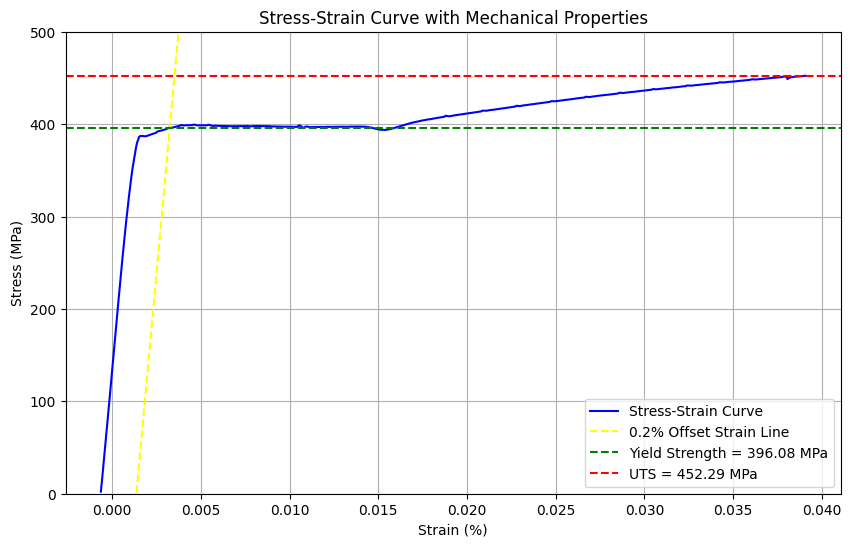

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(strain, stress, label='Stress-Strain Curve', color='blue')
plt.plot(strain, offset_line, label='0.2% Offset Strain Line', color='yellow',linestyle = '--')
plt.axhline(y=yield_strength, label=f'Yield Strength = {yield_strength:.2f} MPa', color='green', linestyle = '--')
plt.axhline(y=uts, color='red', linestyle = '--', label=f'UTS = {uts:.2f} MPa')

plt.xlabel('Strain (%)')
plt.ylabel('Stress (MPa)')
plt.title('Stress-Strain Curve with Mechanical Properties')
plt.legend()
plt.grid(True)
plt.ylim(0, 500)


In [68]:
# Print results
print(f"Young's Modulus (E): {E_GPa:.2f} GPa")
print(f"Ultimate Tensile Strength (UTS): {uts:.2f} MPa")
print(f"Yield Strength: {yield_strength:.2f} MPa")
#print(f"Toughness: {toughness_mj_per_m3:.2f} MJ/m³")

Young's Modulus (E): 210.32 GPa
Ultimate Tensile Strength (UTS): 452.29 MPa
Yield Strength: 396.08 MPa
